In [1]:
# general modules
import pynwb, os, sys
import numpy as np
import matplotlib.pylab as plt

# custom physion module
sys.path.append('..')
from physion.dataviz.show_data import MultimodalData

filename = '/home/yann/DATA/CaImaging/Wild_Type_GCamp6s/2021_04_28/2021_04_28-15-05-26.nwb'
filename = '/home/yann/DATA/CaImaging/Wild_Type_GCamp6s/2021_04_29/2021_04_29-15-46-23.nwb'


data = MultimodalData(filename)

plot_settings = {'settings':{'Photodiode':dict(fig_fraction=.2, subsampling=10),
                             'CaImaging':dict(fig_fraction=3, subsampling=10, roiIndices=np.arange(10)),
                             'VisualStim':dict(fig_fraction=0.02, size=0.2)},'Tbar':10}

tlim = [100, 330]
fig, ax = plt.subplots(1, figsize=(15,5));plt.subplots_adjust(right=1., left=0.)
_ = data.plot_raw_data(tlim, ax=ax, **plot_settings)

UnsupportedOperation: Unable to open file /home/yann/DATA/CaImaging/Wild_Type_GCamp6s/2021_04_29/2021_04_29-15-46-23.nwb in 'r' mode. File does not exist.

## Radius levels

In [19]:
print(np.unique(data.nwbfile.stimulus['radius'].data[:]), 'degrees')

[15. 30. 45. 60.] degrees


### looking for significant evoked response in the minimum radius

In [16]:
# looking for significant evoked response in the minimum radius

MIN_RADIUS = np.min(data.nwbfile.stimulus['radius'].data[:])

ROIS = {'roi':[], 'angle':[], 'x-center':[], 'y-center':[]}
from physion.analysis.stat_tools import CellResponse
for roi in range(np.sum(data.iscell)):
    cell = CellResponse(data, protocol_id=0, roiIndex=roi, quantity='CaImaging', subquantity='dF/F')
    output = cell.compute_responsiveness(interval_pre=[-1,0],
                                         interval_post=[0,1])
    condition = np.array(output['responsive']) & (np.array(output['radius'])==MIN_RADIUS)
    if np.sum(condition)>0:
        evoked = output['mean_post'][condition]-output['mean_pre'][condition]
        imax = np.argmax(evoked)
        ROIS['roi'].append(roi)
        for k in ['angle', 'x-center', 'y-center']:
            ROIS[k].append(output[k][condition][imax])
            
print('ROIS having a significant evoked response: ', ROIS)

KeyboardInterrupt: 

In [17]:
ROIS

{'roi': [], 'angle': [], 'x-center': [], 'y-center': []}

In [8]:
condition = data.nwbfile.stimulus['angle']==ROIS['angle'][imax]

In [9]:
np.array(output['mean_post'])[np.array(output['radius'])==15]

array([0.57816467, 1.72838004, 1.92619605, 1.09741466, 1.19708799,
       1.41701654, 0.80139741, 1.55831581, 0.74771546, 0.35473993,
       0.46706283, 1.00090041, 0.88058837, 1.42792418, 0.48002397,
       0.49960957, 1.7384882 , 0.43706626, 0.39593736, 0.70402472,
       0.72190088, 1.35309896, 0.5170761 , 0.4665527 ])

## Showing spatial selectivity

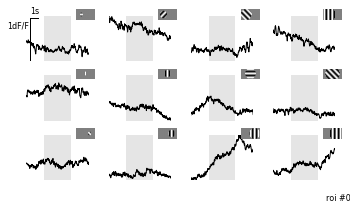

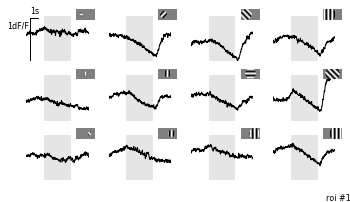

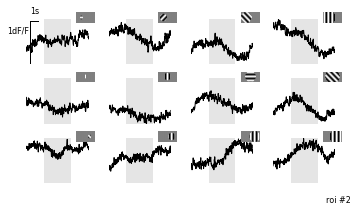

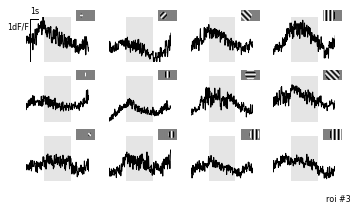

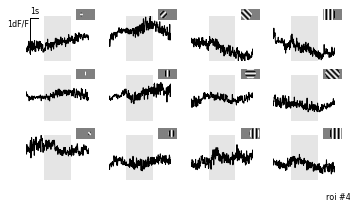

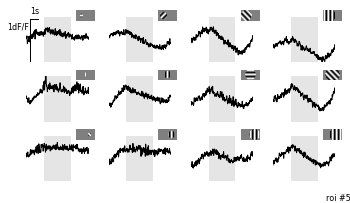

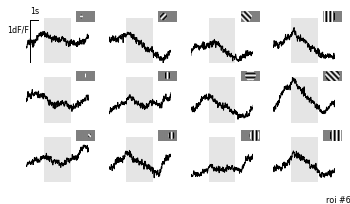

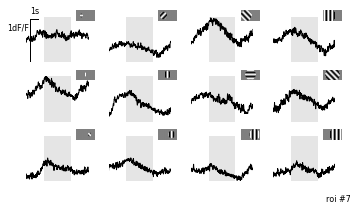

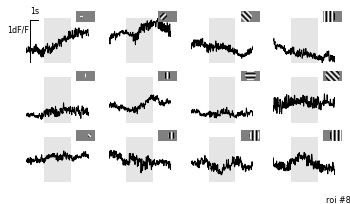

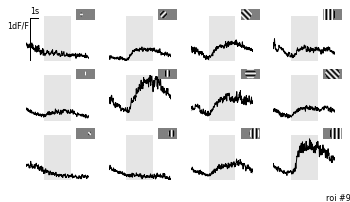

In [15]:
from datavyz import ge

for ir, roi in enumerate(ROIS['roi']):
    condition = (data.nwbfile.stimulus['angle']==ROIS['angle'][ir])
    fig, AX = data.plot_trial_average(protocol_id=0,
                        quantity='CaImaging', subquantity='dF/F', roiIndex=roi,
                        column_key='x-center', row_key='y-center',
                        fig_preset='raw-traces-preset',
                        xbar=1, xbarlabel='1s', ybar=1, ybarlabel='1dF/F',
                        with_std=True,
                        with_screen_inset=True,
                        with_stim=True, prestim_duration=2)
    ge.annotate(fig, 'roi #%i' % roi, (1,0), ha='right')

## Showing size dependency

In [ ]:
from datavyz import ge

for ir, roi in enumerate(ROIS['roi']):
    condition = np.ones(data.nwbfile.stimulus['angle'].num_samples, dtype=bool)
    for k in ['angle', 'x-center', 'y-center']:
        condition = condition & (data.nwbfile.stimulus[k]==ROIS[k][ir])
        
    fig, AX = data.plot_trial_average(protocol_id=0,
                                      condition=condition,
                        quantity='CaImaging', subquantity='dF/F', roiIndex=roi,
                        column_key='radius', row_key='x-center',
                        fig_preset='raw-traces-preset',
                        xbar=1, xbarlabel='1s', ybar=1, ybarlabel='1dF/F',
                        with_std=True,
                        with_screen_inset=True,
                        with_stim=True, prestim_duration=2)
    
    ge.annotate(fig, 'roi #%i' % roi, (1,0), ha='right')